In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
import io
import zipfile

with zipfile.ZipFile(io.BytesIO(uploaded["data.zip"]), 'r') as zip_ref:
    zip_ref.extractall("training-data")

In [4]:
from google.colab import files

uploaded = files.upload()

Saving instances.zip to instances.zip


In [5]:
with zipfile.ZipFile(io.BytesIO(uploaded["instances.zip"]), 'r') as zip_ref:
    zip_ref.extractall("instances")

In [6]:
# clean tsp instance
def extract_coordinates(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    coord_section_index = lines.index("NODE_COORD_SECTION \n") + 1

    coordinates = [list(map(float, line.strip().split()[1:])) for line in lines[coord_section_index:]]

    return coordinates

In [7]:
extract_coordinates("instances/instances/syn_tsp101.tsp")

[[6075.806908831769, 6465.459097028902],
 [1805.7093632409117, 7995.407087240192],
 [5445.28520578996, 4709.201310290762],
 [4958.446922875073, 4673.997127669553],
 [2533.036625960641, 3778.6898032738945],
 [5038.68622672101, 9796.680828742017],
 [6903.350369197077, 4121.00671838615],
 [7731.861596532035, 8600.158557245406],
 [6109.273940377136, 4844.822303021038],
 [5669.766963258698, 6325.045709491309],
 [4203.46698964822, 9567.637308171385],
 [9513.85872348577, 7458.025673101819],
 [8418.091434481072, 2834.239121002633],
 [3805.69633891788, 701.2654225968452],
 [3408.63315541289, 4874.748922237631],
 [3582.4275326243205, 6734.823796827744],
 [7579.383681027281, 8807.636128957125],
 [4465.230672654528, 4254.656775981333],
 [3426.0127567748486, 6253.612203657547],
 [6655.961312536285, 5903.31317428554],
 [6321.242697973241, 5975.006979370272],
 [6949.93866268607, 5136.079762560019],
 [3670.930539292524, 5273.267920504382],
 [8398.719454806347, 1526.1890320388284],
 [8242.731039512464,

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

normalized_data = scaler.fit_transform(extract_coordinates("instances/instances/syn_tsp101.tsp"))

In [9]:
normalized_data

array([[0.55397182, 0.64177389],
       [0.        , 0.80629831],
       [0.47217246, 0.45291303],
       [0.40901355, 0.44912731],
       [0.09435822, 0.35284958],
       [0.41942323, 1.        ],
       [0.66133137, 0.38966096],
       [0.76881648, 0.87133083],
       [0.55831359, 0.46749716],
       [0.50129511, 0.6266744 ],
       [0.31106787, 0.97536959],
       [1.        , 0.74851048],
       [0.85784301, 0.25128718],
       [0.25946396, 0.02191581],
       [0.20795183, 0.47071535],
       [0.23049867, 0.67074028],
       [0.74903509, 0.89364213],
       [0.34502722, 0.40403315],
       [0.21020654, 0.61899273],
       [0.62923689, 0.58132299],
       [0.5858129 , 0.58903265],
       [0.6673754 , 0.49881781],
       [0.24198041, 0.51357047],
       [0.85532983, 0.11062476],
       [0.83509301, 0.24024476],
       [0.52278943, 0.68423702],
       [0.58651642, 0.41517203],
       [0.86096475, 0.03517713],
       [0.41617046, 0.33532821],
       [0.85045053, 0.        ]])

In [10]:
# testing combining data into a dataframe for a single instance
coordinates = extract_coordinates("instances/instances/syn_tsp101.tsp")
flat_coordinates = [coord for sublist in normalized_data for coord in sublist]
idf = pd.DataFrame(data=[flat_coordinates])
ddf = pd.read_csv("training-data/data/syn_tsp101_instance1.csv")


ddf["E_avg"] /= max(max(map(abs, row)) for row in coordinates)

idf_repeated = pd.concat([idf] * len(ddf), ignore_index=True)
new_df = pd.concat([idf_repeated, ddf], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,Relaxation Parameter A,Probability P_f,E_avg,E_std,E_min
0,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,4218.00,0.070312,6.837445,4649.904420,53518.151014
1,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,4250.82,0.062500,6.815322,4467.012351,54283.345921
2,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,4283.64,0.054688,6.918838,4606.098256,56801.810406
3,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,4316.46,0.046875,6.936339,4428.735985,57256.237944
4,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,4349.28,0.054688,6.930048,4117.578820,57903.136557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,7335.90,0.929688,9.148504,7083.258787,74993.455798
96,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,7368.72,0.945312,9.235136,7504.306268,75748.035340
97,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,7401.54,0.953125,9.253635,7352.265232,69132.672314
98,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.035177,0.41617,0.335328,0.850451,0.0,7434.36,0.921875,9.220522,7237.830537,70503.720228


In [11]:
# combining all training data

import os

# training data
training_path = "training-data/data"
training_file_list = sorted(os.listdir(training_path))
csv_files = [file for file in training_file_list if file.endswith('.csv')]

# instances
instance_path = "instances/instances"
instance_file_list = sorted(os.listdir(instance_path))
instance_files = [file for file in instance_file_list if file.endswith('.tsp')]

combined_df = pd.DataFrame()

i = 0
for csv_file in csv_files:
    file_path = os.path.join(training_path, csv_file)
    data_df = pd.read_csv(file_path)

    coordinates = extract_coordinates(os.path.join(instance_path,instance_files[i]))

    #scaler = StandardScaler()
    scaler = MinMaxScaler()
    normalized_coords = scaler.fit_transform(coordinates)

    flat_coordinates = [coord for sublist in normalized_coords for coord in sublist]
    instance_df = pd.DataFrame(data=[flat_coordinates])

    instance_df_repeated = pd.concat([instance_df] * len(data_df), ignore_index=True)
    new_df = pd.concat([instance_df_repeated, data_df], axis=1)

    #new_df["E_avg"] /= max(max(map(abs, row)) for row in coordinates) # normalizing the output energy
    new_df["E_avg"] = scaler.fit_transform(new_df["E_avg"].values.reshape(-1,1))
    combined_df = pd.concat([combined_df, new_df], ignore_index=True)
    i = i + 1

# remove E_std and E_min
combined_df = combined_df.iloc[:, :-2]
combined_df["E_avg"] = combined_df["E_avg"] / combined_df["E_avg"].max()
#combined_df["E_avg"] = scaler.fit_transform(combined_df["E_avg"].values.reshape(-1,1))
combined_df["Relaxation Parameter A"] = scaler.fit_transform(combined_df["Relaxation Parameter A"].values.reshape(-1,1))

In [12]:
combined_df

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,Relaxation Parameter A,Probability P_f,E_avg
0,0.553972,0.641774,0.000000,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.352850,...,0.415172,0.860965,0.035177,0.416170,0.335328,0.850451,0.000000,0.423920,0.070312,0.009073
1,0.553972,0.641774,0.000000,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.352850,...,0.415172,0.860965,0.035177,0.416170,0.335328,0.850451,0.000000,0.427218,0.062500,0.000000
2,0.553972,0.641774,0.000000,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.352850,...,0.415172,0.860965,0.035177,0.416170,0.335328,0.850451,0.000000,0.430517,0.054688,0.042454
3,0.553972,0.641774,0.000000,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.352850,...,0.415172,0.860965,0.035177,0.416170,0.335328,0.850451,0.000000,0.433815,0.046875,0.049631
4,0.553972,0.641774,0.000000,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.352850,...,0.415172,0.860965,0.035177,0.416170,0.335328,0.850451,0.000000,0.437114,0.054688,0.047052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8495,0.534081,0.650160,0.754381,1.000000,0.914915,0.959476,1.000000,0.341827,0.422104,0.229659,...,0.538619,0.059366,0.438796,0.981874,0.957276,0.320265,0.914407,0.048915,0.984375,0.971994
8496,0.534081,0.650160,0.754381,1.000000,0.914915,0.959476,1.000000,0.341827,0.422104,0.229659,...,0.538619,0.059366,0.438796,0.981874,0.957276,0.320265,0.914407,0.049182,1.000000,0.995401
8497,0.534081,0.650160,0.754381,1.000000,0.914915,0.959476,1.000000,0.341827,0.422104,0.229659,...,0.538619,0.059366,0.438796,0.981874,0.957276,0.320265,0.914407,0.049449,1.000000,0.946120
8498,0.534081,0.650160,0.754381,1.000000,0.914915,0.959476,1.000000,0.341827,0.422104,0.229659,...,0.538619,0.059366,0.438796,0.981874,0.957276,0.320265,0.914407,0.049717,1.000000,1.000000


In [13]:
X = combined_df.iloc[:, :-2]
y = combined_df.iloc[:, 61:]

In [14]:
X.columns = X.columns.astype(str)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , x_test, Y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100, shuffle=False)
x_train , x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=100, shuffle=False)

In [17]:
x_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Relaxation Parameter A
0,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.423920
1,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.427218
2,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.430517
3,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.433815
4,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.437114
5,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.440412
6,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.443711
7,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.447009
8,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.450308
9,0.553972,0.641774,0.0,0.806298,0.472172,0.452913,0.409014,0.449127,0.094358,0.35285,...,0.684237,0.586516,0.415172,0.860965,0.035177,0.41617,0.335328,0.850451,0.0,0.453606


In [18]:
x_train.describe().round(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Relaxation Parameter A
count,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,...,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000,6885.000
mean,0.415,0.475,0.390,0.452,0.445,0.504,0.484,0.436,0.446,0.507,...,0.413,0.494,0.454,0.436,0.400,0.458,0.470,0.448,0.440,0.435
std,0.292,0.303,0.324,0.300,0.320,0.316,0.339,0.312,0.314,0.324,...,0.321,0.313,0.303,0.331,0.282,0.305,0.320,0.285,0.316,0.304
min,0.000,0.000,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.145,0.213,0.093,0.192,0.158,0.192,0.170,0.186,0.166,0.243,...,0.107,0.251,0.226,0.102,0.152,0.170,0.190,0.228,0.180,0.098
50%,0.393,0.429,0.330,0.390,0.377,0.476,0.409,0.352,0.387,0.497,...,0.339,0.447,0.426,0.432,0.333,0.439,0.439,0.454,0.388,0.497
75%,0.645,0.738,0.659,0.663,0.740,0.808,0.831,0.666,0.725,0.758,...,0.698,0.752,0.657,0.705,0.632,0.668,0.751,0.635,0.744,0.701
max,0.965,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,0.924,1.000,1.000,1.000,1.000,1.000


In [19]:
x_val.describe().round(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Relaxation Parameter A
count,765.000,765.000,765.000,765.000,765.000,765.000,765.000,765.000,765.000,765.000,...,765.000,765.000,765.000,765.000,765.000,765.000,765.000,765.000,765.000,765.000
mean,0.616,0.644,0.460,0.367,0.557,0.554,0.685,0.549,0.365,0.552,...,0.297,0.495,0.409,0.368,0.643,0.573,0.566,0.426,0.533,0.035
std,0.220,0.286,0.301,0.254,0.327,0.301,0.328,0.318,0.320,0.352,...,0.243,0.344,0.252,0.256,0.206,0.285,0.363,0.257,0.255,0.007
min,0.346,0.245,0.126,0.020,0.000,0.014,0.110,0.047,0.000,0.000,...,0.000,0.061,0.000,0.033,0.276,0.000,0.000,0.177,0.177,0.022
25%,0.429,0.255,0.160,0.142,0.496,0.335,0.284,0.239,0.043,0.164,...,0.162,0.158,0.158,0.058,0.494,0.389,0.100,0.210,0.372,0.029
50%,0.567,0.776,0.407,0.382,0.526,0.651,0.865,0.448,0.251,0.726,...,0.225,0.315,0.526,0.392,0.604,0.627,0.701,0.331,0.376,0.035
75%,0.907,0.921,0.874,0.611,0.892,0.676,0.975,0.954,0.754,0.817,...,0.351,0.756,0.622,0.698,0.802,0.898,0.892,0.573,0.852,0.041
max,1.000,0.972,0.950,0.817,0.978,1.000,1.000,0.962,0.897,1.000,...,0.993,1.000,0.861,0.719,0.954,0.947,1.000,0.886,0.873,0.050


In [20]:
x_test.describe().round(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Relaxation Parameter A
count,850.000,850.000,850.000,850.000,850.000,850.000,850.000,850.000,850.000,850.000,...,850.000,850.000,850.000,850.000,850.000,850.000,850.000,850.000,850.000,850.000
mean,0.467,0.459,0.379,0.584,0.561,0.684,0.493,0.540,0.596,0.359,...,0.419,0.490,0.643,0.480,0.491,0.604,0.578,0.407,0.531,0.037
std,0.299,0.283,0.244,0.318,0.314,0.286,0.316,0.195,0.309,0.286,...,0.228,0.399,0.339,0.251,0.299,0.329,0.247,0.232,0.289,0.008
min,0.033,0.000,0.000,0.095,0.000,0.299,0.065,0.213,0.137,0.078,...,0.002,0.020,0.101,0.059,0.042,0.092,0.144,0.109,0.000,0.022
25%,0.328,0.268,0.234,0.189,0.348,0.361,0.211,0.391,0.345,0.151,...,0.263,0.106,0.190,0.318,0.208,0.460,0.365,0.319,0.387,0.030
50%,0.534,0.499,0.351,0.640,0.714,0.873,0.447,0.505,0.422,0.237,...,0.345,0.599,0.682,0.573,0.496,0.518,0.593,0.322,0.478,0.037
75%,0.671,0.650,0.595,0.816,0.772,0.944,0.638,0.680,0.912,0.670,...,0.594,0.962,0.968,0.583,0.838,0.980,0.682,0.561,0.645,0.043
max,1.000,0.866,0.754,1.000,0.915,1.000,1.000,0.849,1.000,0.903,...,0.732,1.000,1.000,0.912,0.903,1.000,0.957,0.879,0.986,0.050


In [21]:
from sklearn.decomposition import PCA

In [22]:
pca1=PCA()

In [23]:
x_train_pca1=pca1.fit(x_train)

In [24]:
x_train_pca1.explained_variance_ratio_

array([0.13228735, 0.04653177, 0.04543681, 0.04214884, 0.04084345,
       0.03892987, 0.0374556 , 0.03640468, 0.03463987, 0.03186176,
       0.02971353, 0.02907071, 0.02818085, 0.02631143, 0.02390466,
       0.02296678, 0.02203849, 0.02083251, 0.02032669, 0.0195974 ,
       0.01879846, 0.01755737, 0.01662975, 0.01619657, 0.01537532,
       0.01392905, 0.01324162, 0.01257066, 0.01228447, 0.01120358,
       0.01103319, 0.00945898, 0.00902847, 0.0083776 , 0.00822189,
       0.00763827, 0.00714797, 0.00689522, 0.00592541, 0.00548922,
       0.00533116, 0.0049704 , 0.00448193, 0.00384172, 0.00332017,
       0.003093  , 0.00280728, 0.00245123, 0.00222869, 0.00203315,
       0.00154498, 0.00143076, 0.00125167, 0.00101693, 0.00094747,
       0.00084482, 0.00070067, 0.00045721, 0.00031691, 0.0002852 ,
       0.00015858])

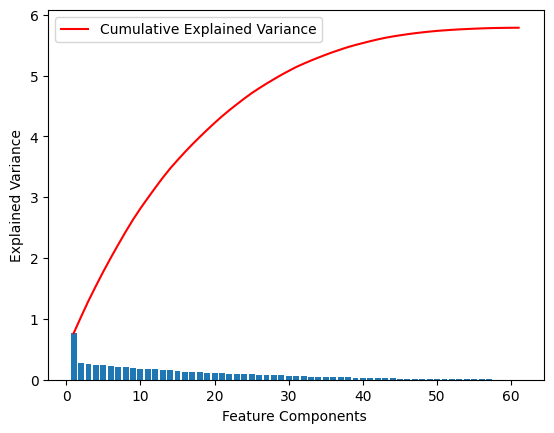

In [25]:
plt.bar(range(1,len(pca1.explained_variance_ )+1), pca1.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Feature Components ')
plt.plot(range(1,len(pca1.explained_variance_ )+1),
         np.cumsum(pca1.explained_variance_),
         c='red',
         label = "Cumulative Explained Variance")
plt.legend(loc='upper left')

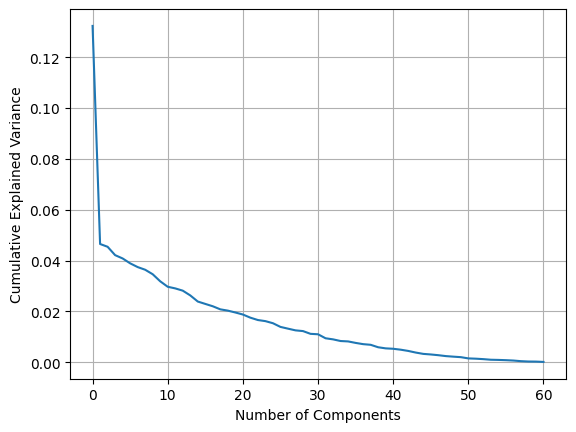

In [26]:
plt.plot(x_train_pca1.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [27]:
pca2=PCA(0.5)

In [28]:
x_pca2=pca2.fit_transform(x_train)

In [29]:
x_pca2.shape

(6885, 11)

In [30]:
pca2.n_components_

11

In [31]:
pca3=PCA(pca2.n_components_)

In [32]:
train_pca = pca3.fit_transform(x_train)
val_pca = pca3.fit(x_train).transform(x_val)
test_pca = pca3.fit(x_train).transform(x_test)

In [33]:
train_pca_std = np.std(train_pca)
train_pca_std

0.5211775756122616

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, GaussianNoise, BatchNormalization

In [35]:
input=pca3.n_components_
batch_size = 64
epochs = 10000
h1=64
h2=64
h3=32
output=2
dropout=0.4

#Applying PCA to potentially extract only the useful features

In [36]:
model_pca = Sequential()
model_pca.add(keras.Input(shape=(input,)))
model_pca.add(Dense(h1, activation='sigmoid'))
#model_pca.add(GaussianNoise(train_pca_std))
model_pca.add(BatchNormalization())
model_pca.add(Dropout(dropout))
model_pca.add(Dense(h2, activation='sigmoid'))
#model_pca.add(GaussianNoise(train_pca_std))
model_pca.add(BatchNormalization())
model_pca.add(Dropout(dropout))
model_pca.add(Dense(h3, activation='sigmoid'))
#model_pca.add(GaussianNoise(train_pca_std))
model_pca.add(BatchNormalization())
model_pca.add(Dropout(dropout))
model_pca.add(Dense(output, activation='sigmoid'))

In [37]:
model_pca.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,714 (30.13 KB)

 Trainable params: 7,394 (28.88 KB)

 Non-trainable params: 320 (1.25 KB)

In [38]:
model_pca.compile(loss=keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='loss',  patience=2000)

In [39]:
history = model_pca.fit(train_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=2,callbacks=[callback],
                    validation_data=(val_pca, y_val))

Streaming output truncated to the last 5000 lines.
Epoch 358/10000
108/108 - 0s - 3ms/step - accuracy: 0.7047 - loss: 0.0589 - val_accuracy: 0.7464 - val_loss: 0.1042
Epoch 359/10000
108/108 - 0s - 3ms/step - accuracy: 0.7034 - loss: 0.0596 - val_accuracy: 0.7464 - val_loss: 0.0978
Epoch 360/10000
108/108 - 0s - 3ms/step - accuracy: 0.7086 - loss: 0.0592 - val_accuracy: 0.7464 - val_loss: 0.1055
Epoch 361/10000
108/108 - 0s - 3ms/step - accuracy: 0.7031 - loss: 0.0595 - val_accuracy: 0.7503 - val_loss: 0.1016
Epoch 362/10000
108/108 - 0s - 3ms/step - accuracy: 0.7113 - loss: 0.0609 - val_accuracy: 0.7464 - val_loss: 0.1038
Epoch 363/10000
108/108 - 0s - 3ms/step - accuracy: 0.7182 - loss: 0.0597 - val_accuracy: 0.7451 - val_loss: 0.1044
Epoch 364/10000
108/108 - 0s - 3ms/step - accuracy: 0.7213 - loss: 0.0601 - val_accuracy: 0.7503 - val_loss: 0.1081
Epoch 365/10000
108/108 - 0s - 3ms/step - accuracy: 0.7082 - loss: 0.0609 - val_accuracy: 0.7464 - val_loss: 0.1030
Epoch 366/10000
108/1

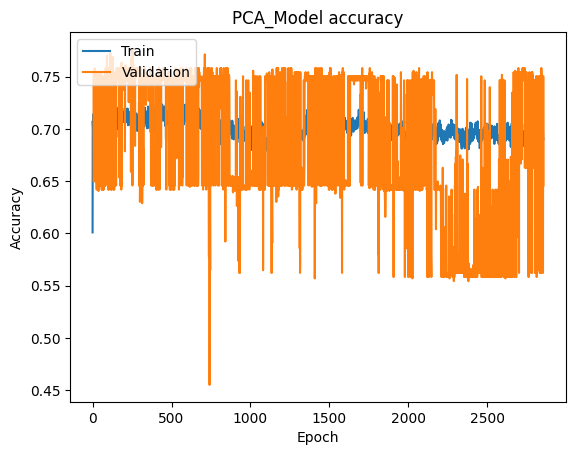

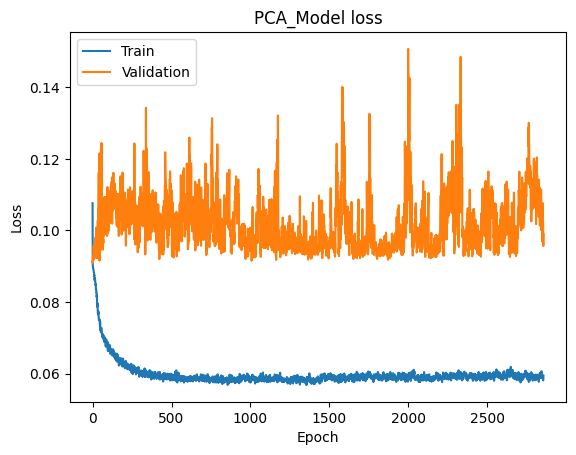

In [40]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('PCA_Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('PCA_Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
pca_test_loss, pca_test_acc = model_pca.evaluate(test_pca, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6533 - loss: 0.0947 


In [42]:
pca_scores = model_pca.evaluate(train_pca, y_train)
print("Post-PCA Training Accuracy: %.2f%%\n" % (pca_scores[1]*100))
pca_scores = model_pca.evaluate(test_pca, y_test)
print("Post-PCA Testing Accuracy: %.2f%%\n" % (pca_scores[1]*100))

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7144 - loss: 0.0265
Post-PCA Training Accuracy: 72.27%

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6533 - loss: 0.0947 
Post-PCA Testing Accuracy: 63.88%



In [43]:
p_f_list=[]
p_f_list=[i for i in y_test.iloc[:, 0].to_numpy()]
p_f_list

[0.78125,
 0.7890625,
 0.84375,
 0.8359375,
 0.8515625,
 0.78125,
 0.84375,
 0.8828125,
 0.890625,
 0.828125,
 0.8203125,
 0.8828125,
 0.9140625,
 0.890625,
 0.8828125,
 0.921875,
 0.8984375,
 0.8984375,
 0.890625,
 0.8515625,
 0.9140625,
 0.8828125,
 0.9375,
 0.90625,
 0.9375,
 0.96875,
 0.953125,
 0.890625,
 0.953125,
 0.9609375,
 0.96875,
 0.96875,
 0.96875,
 0.9609375,
 0.9609375,
 0.9453125,
 0.9609375,
 1.0,
 0.9609375,
 0.9765625,
 0.984375,
 0.9921875,
 0.9609375,
 0.984375,
 0.984375,
 1.0,
 0.96875,
 1.0,
 0.9765625,
 0.9921875,
 0.03125,
 0.015625,
 0.078125,
 0.046875,
 0.015625,
 0.09375,
 0.0859375,
 0.1015625,
 0.1015625,
 0.09375,
 0.15625,
 0.125,
 0.1328125,
 0.109375,
 0.1875,
 0.21875,
 0.25,
 0.21875,
 0.296875,
 0.2734375,
 0.265625,
 0.3125,
 0.296875,
 0.3828125,
 0.3359375,
 0.375,
 0.359375,
 0.390625,
 0.40625,
 0.4296875,
 0.5,
 0.40625,
 0.4921875,
 0.546875,
 0.5078125,
 0.5703125,
 0.5390625,
 0.5390625,
 0.65625,
 0.6015625,
 0.5234375,
 0.59375,
 0.6171

In [44]:
pca_p_f_prediction_list=[]
pca_p_f_predictions = model_pca.predict(test_pca)
pca_p_f_prediction_list=[i for i in pca_p_f_predictions[:, 0]]
pca_p_f_prediction_list


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.5980465,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.52545077,
 0.5254507

In [45]:
e_avg_list=[]
e_avg_list=[i for i in y_test.iloc[:, 1].to_numpy()]
e_avg_list

[0.6248362644219931,
 0.6382145820330504,
 0.6618455917510137,
 0.6433856709756217,
 0.649614836238008,
 0.7052085486401533,
 0.7011860404361793,
 0.7353495183608111,
 0.6750307014045661,
 0.7102005126440273,
 0.7053044463278512,
 0.7332914433280481,
 0.6995178823073075,
 0.7347480918264339,
 0.737669882786499,
 0.7517561208794828,
 0.8289865643776043,
 0.7689996853256719,
 0.7756661825227519,
 0.7785826209267671,
 0.7863727839127718,
 0.7945192463388865,
 0.8620738599399497,
 0.8452777724590851,
 0.9099879802616999,
 0.8408324299062865,
 0.847820321911899,
 0.8661161525879592,
 0.8924807840630882,
 0.8566098283843756,
 0.8739034747483881,
 0.8548785519132408,
 0.8881537524115948,
 0.8735355200469656,
 0.9018828822332323,
 0.8976010783130612,
 0.9287859373937728,
 0.8996870440045752,
 0.9535752112259379,
 0.9362436235404714,
 0.8829079257287256,
 0.9292749093283006,
 0.9513611903498886,
 0.9931995124851807,
 0.9322226254038473,
 0.9489577595509826,
 0.9603463496869358,
 0.9542428935413

In [46]:
pca_e_avg_prediction_list=[]
pca_e_avg_predictions = model_pca.predict(test_pca)
pca_e_avg_prediction_list=[i for i in pca_e_avg_predictions[:, 1]]
pca_e_avg_prediction_list

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


[0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5521335,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5339712,
 0.5

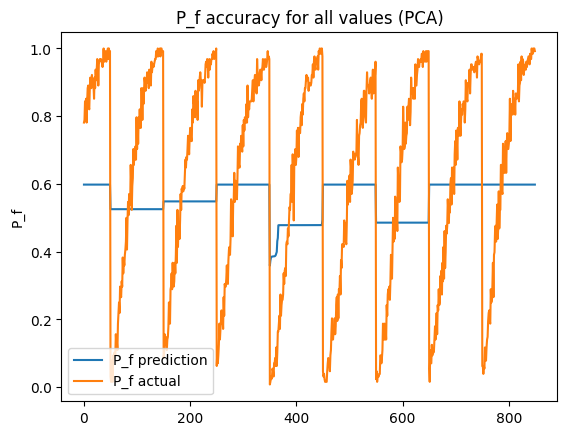

In [47]:
x = [i for i in range(len(pca_p_f_prediction_list))]
plt.plot(x, pca_p_f_prediction_list, label='P_f prediction')
plt.plot(x, p_f_list, label='P_f actual')
plt.ylabel('P_f')
plt.title('P_f accuracy for all values (PCA)')
plt.legend()
plt.show()

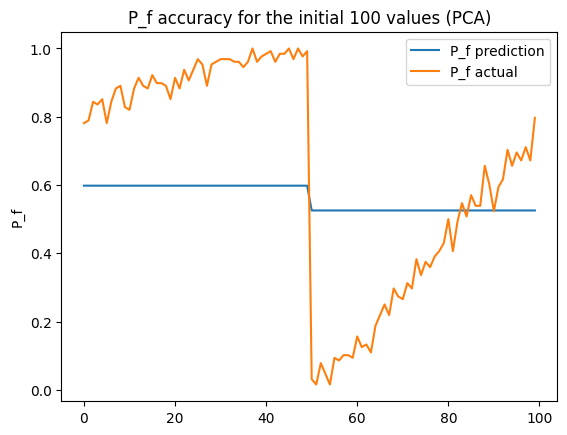

In [48]:
x = [i for i in range(len(pca_p_f_prediction_list))[:100]]
plt.plot(x, pca_p_f_prediction_list[:100], label='P_f prediction')
plt.plot(x, p_f_list[:100], label='P_f actual')
plt.ylabel('P_f')
plt.title('P_f accuracy for the initial 100 values (PCA)')
plt.legend()
plt.show()

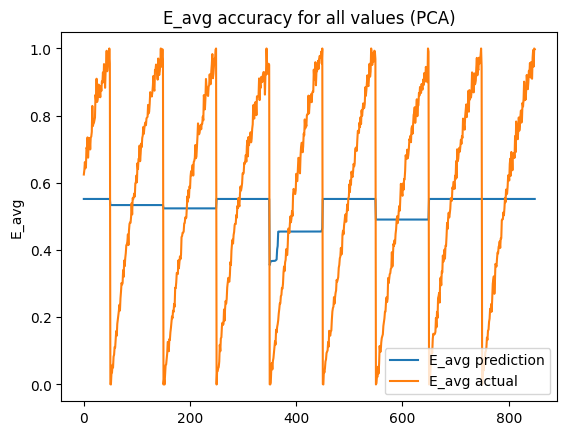

In [49]:
x = [i for i in range(len(pca_e_avg_prediction_list))]
plt.plot(x, pca_e_avg_prediction_list, label='E_avg prediction')
plt.plot(x, e_avg_list, label='E_avg actual')
plt.ylabel('E_avg')
plt.title('E_avg accuracy for all values (PCA)')
plt.legend()
plt.show()

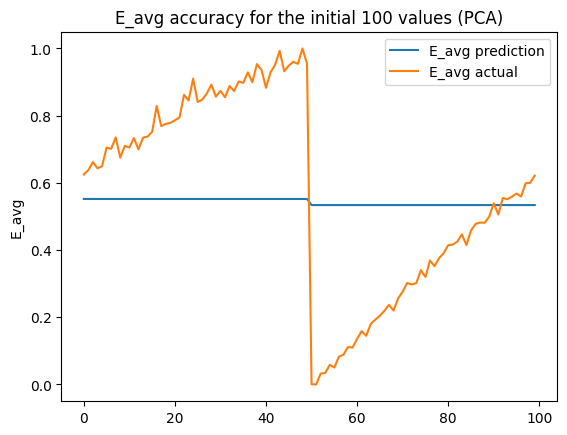

In [50]:
x = [i for i in range(len(pca_e_avg_prediction_list))[:100]]
plt.plot(x, pca_e_avg_prediction_list[:100], label='E_avg prediction')
plt.plot(x, e_avg_list[:100], label='E_avg actual')
plt.ylabel('E_avg')
plt.title('E_avg accuracy for the initial 100 values (PCA)')
plt.legend()
plt.show()

#The original number of features=61

In [51]:
model = Sequential()
model.add(keras.Input(shape=(61,)))
model.add(Dense(h1, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(h2, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(h3, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(Dense(output, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │           3,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,914 (42.63 KB)

 Trainable params: 10,594 (41.38 KB)

 Non-trainable params: 320 (1.25 KB)

In [53]:
model.compile(loss=keras.losses.MeanSquaredError(),
              optimizer=keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='loss',  patience=2000)

In [54]:
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=2,callbacks=[callback],
                    validation_data=(x_val, y_val))

Epoch 1/10000
108/108 - 3s - 32ms/step - accuracy: 0.6049 - loss: 0.0988 - val_accuracy: 0.7542 - val_loss: 0.0926
Epoch 2/10000
108/108 - 0s - 4ms/step - accuracy: 0.7082 - loss: 0.0666 - val_accuracy: 0.2458 - val_loss: 0.1401
Epoch 3/10000
108/108 - 0s - 4ms/step - accuracy: 0.7213 - loss: 0.0547 - val_accuracy: 0.3111 - val_loss: 0.1814
Epoch 4/10000
108/108 - 0s - 5ms/step - accuracy: 0.7245 - loss: 0.0501 - val_accuracy: 0.3529 - val_loss: 0.1803
Epoch 5/10000
108/108 - 1s - 5ms/step - accuracy: 0.7227 - loss: 0.0461 - val_accuracy: 0.1948 - val_loss: 0.2192
Epoch 6/10000
108/108 - 1s - 5ms/step - accuracy: 0.7312 - loss: 0.0449 - val_accuracy: 0.6275 - val_loss: 0.1900
Epoch 7/10000
108/108 - 0s - 4ms/step - accuracy: 0.7288 - loss: 0.0437 - val_accuracy: 0.4327 - val_loss: 0.1665
Epoch 8/10000
108/108 - 0s - 3ms/step - accuracy: 0.7296 - loss: 0.0422 - val_accuracy: 0.5346 - val_loss: 0.1848
Epoch 9/10000
108/108 - 0s - 3ms/step - accuracy: 0.7390 - loss: 0.0411 - val_accuracy:

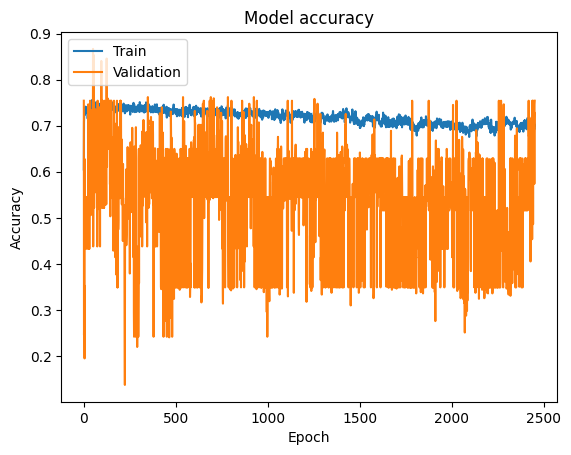

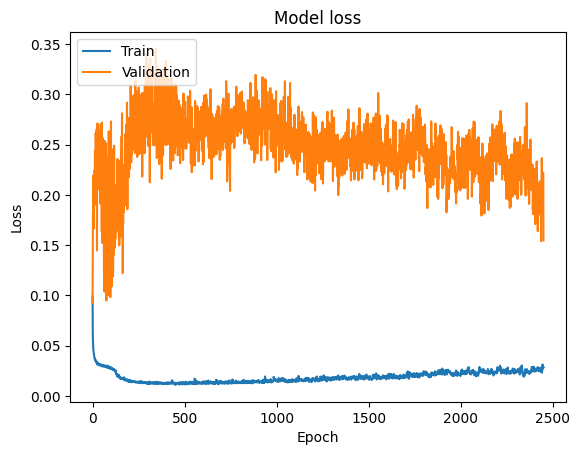

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8388 - loss: 0.2039 


In [57]:
scores = model.evaluate(x_train, y_train)
print("Pre-PCA Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test, y_test)
print("Pre-PCA Testing Accuracy: %.2f%%\n" % (scores[1]*100))

216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7169 - loss: 0.0315
Pre-PCA Training Accuracy: 72.32%

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8388 - loss: 0.2039 
Pre-PCA Testing Accuracy: 77.76%



In [58]:
p_f_prediction_list=[]
p_f_predictions = model.predict(x_test)
p_f_prediction_list=[i for i in p_f_predictions[:, 0]]
p_f_prediction_list

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3012207,
 0.3

In [59]:
e_avg_prediction_list=[]
e_avg_predictions = model.predict(x_test)
e_avg_prediction_list=[i for i in e_avg_predictions[:, 1]]
e_avg_prediction_list

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2673127,
 0.2

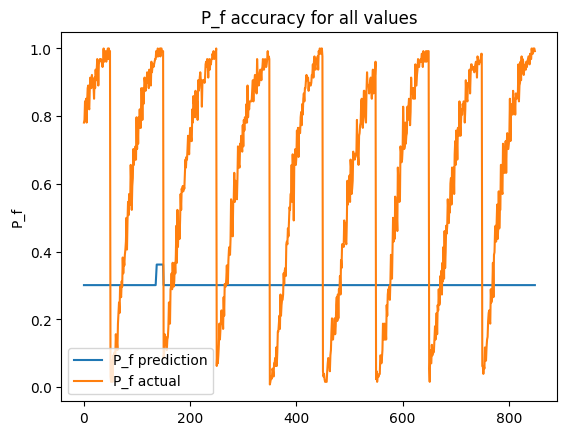

In [60]:
x = [i for i in range(len(p_f_prediction_list))]
plt.plot(x, p_f_prediction_list, label='P_f prediction')
plt.plot(x, p_f_list, label='P_f actual')
plt.ylabel('P_f')
plt.title('P_f accuracy for all values')
plt.legend()
plt.show()

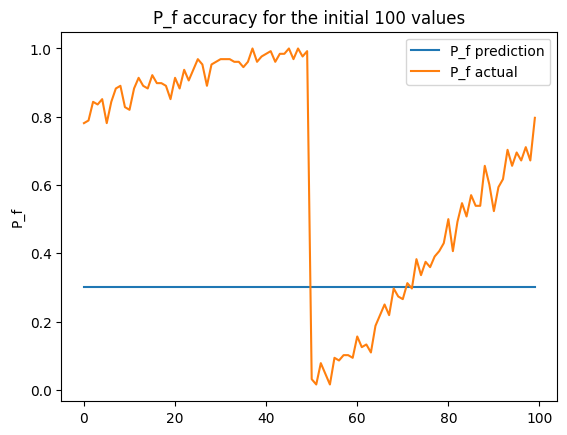

In [61]:
x = [i for i in range(len(p_f_prediction_list[:100]))]
plt.plot(x, p_f_prediction_list[:100], label='P_f prediction')
plt.plot(x, p_f_list[:100], label='P_f actual')
plt.ylabel('P_f')
plt.title('P_f accuracy for the initial 100 values')
plt.legend()
plt.show()

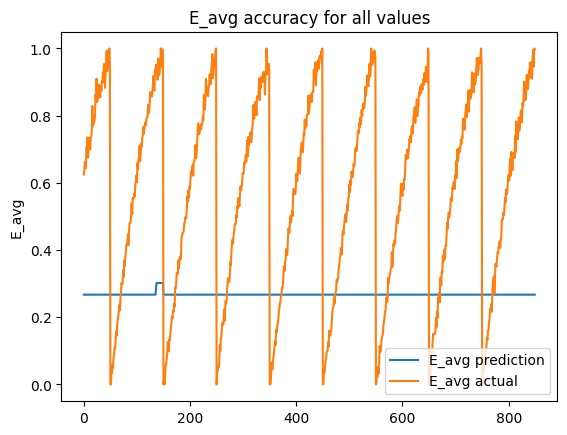

In [62]:
x = [i for i in range(len(e_avg_prediction_list))]
plt.plot(x, e_avg_prediction_list, label='E_avg prediction')
plt.plot(x, e_avg_list, label='E_avg actual')
plt.ylabel('E_avg')
plt.title('E_avg accuracy for all values')
plt.legend()
plt.show()

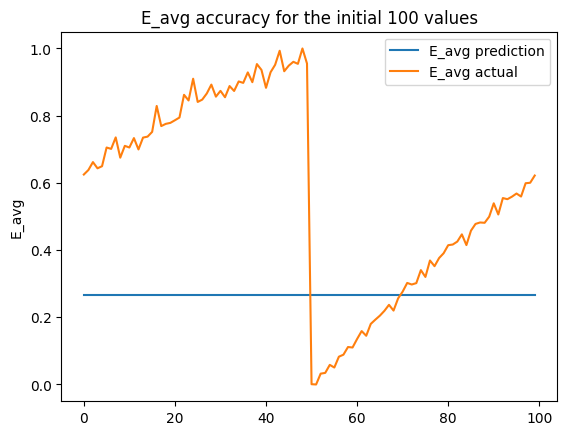

In [63]:
x = [i for i in range(len(e_avg_prediction_list))[:100]]
plt.plot(x, e_avg_prediction_list[:100], label='E_avg prediction')
plt.plot(x, e_avg_list[:100], label='E_avg actual')
plt.ylabel('E_avg')
plt.title('E_avg accuracy for the initial 100 values')
plt.legend()
plt.show()